## 1. Data Preparation

In [151]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [152]:
# data importing 
default = pd.read_csv('./Assignment/prediktiv_data.csv',na_values='?', index_col='id') 

In [153]:
default.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,2,good,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,0,NaN,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,0,NaN,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,2,bad,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,1,bad,bad,3,1,3,2010,1,701,1998


In [154]:
len(default)

2930

In [155]:
# number of NaN values
nan_per_col = default.isna().sum()
print(nan_per_col)

target            0
feature01         1
feature02         1
feature03         0
feature04         1
feature05         0
feature06         0
feature07         0
feature08         0
feature09         0
feature10         0
feature10.1       0
feature11      2732
feature12      2358
feature13         1
feature14         0
feature15      1422
feature16         0
feature17         0
feature18         0
feature19         0
feature20         0
feature21         0
feature22         0
feature23         0
dtype: int64


In [156]:
# Showing all variables with missing values
missing_values = nan_per_col[nan_per_col>0]
print(missing_values)

feature01       1
feature02       1
feature04       1
feature11    2732
feature12    2358
feature13       1
feature15    1422
dtype: int64


In [157]:
# Deleting columns with majority of missing values
default.drop(['feature11','feature12','feature15'], axis=1, inplace=True)

In [158]:
default.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature13,feature14,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,red,2,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,red,0,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,red,0,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,red,2,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,red,1,bad,3,1,3,2010,1,701,1998


In [159]:
# Deleting three rows with missing values, id=1342/1578/2237
default = default.drop([1342])
default = default.drop([1578])
default = default.drop([2237])

In [160]:
len(default)

2927

In [161]:
print(default.isna().sum())

target         0
feature01      0
feature02      0
feature03      0
feature04      0
feature05      0
feature06      0
feature07      0
feature08      0
feature09      0
feature10      0
feature10.1    0
feature13      0
feature14      0
feature16      0
feature17      0
feature18      0
feature19      0
feature20      0
feature21      0
feature22      0
feature23      0
dtype: int64


In [162]:
# Create dummy variables
# Base values: feature13, feature16

print(default['feature13'].unique())
print(default['feature16'].unique())

default['red'] = (default['feature13'] == 'red').astype('int')
default['blue'] = (default['feature13'] == 'blue').astype('int')
default['green'] = (default['feature13'] == 'green').astype('int')
default['yellow'] = (default['feature13'] == 'yellow').astype('int')
default['pink'] = (default['feature13'] == 'pink').astype('int')

# Remove columns
default.drop(['feature13'] , axis=1, inplace=True)

default['horrible'] = (default['feature16'] == 'horrible').astype('int')
default['bad'] = (default['feature16'] == 'bad').astype('int')
default['okay'] = (default['feature16'] == 'okay').astype('int')
default['good'] = (default['feature16'] == 'good').astype('int')
default['amazing'] = (default['feature16'] == 'amazing').astype('int')

# Remove columns
default.drop(['feature16'] , axis=1, inplace=True)

default.head()

['red' 'blue' 'green' 'yellow' 'pink']
['bad' 'good' 'amazing' 'okay' 'horrible']


,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,red,blue,green,yellow,pink,horrible,bad,okay,good,amazing
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,1,0,0,0,0,0,1,0,0,0
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,1,0,0,0,0,0,1,0,0,0
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,1,0,0,0,0,0,0,0,1,0
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,1,0,0,0,0,0,0,0,0,1
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,1,0,0,0,0,0,1,0,0,0


In [163]:
# Features with the highest correlation with the target
top_corr_features = default.corr().loc['target'].apply(np.abs).sort_values(ascending=False).index[1:40]
top_corr_features = list(top_corr_features)
top_corr_features

['feature08',
 'feature07',
 'feature01',
 'feature02',
 'feature04',
 'feature05',
 'feature10',
 'feature10.1',
 'amazing',
 'feature23',
 'bad',
 'feature06',
 'feature14',
 'good',
 'feature21',
 'feature22',
 'red',
 'blue',
 'okay',
 'feature17',
 'green',
 'feature18',
 'feature09',
 'feature03',
 'yellow',
 'feature19',
 'feature20',
 'pink',
 'horrible']

### Getting the train and test sets

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [165]:
## 5 Features with the highest correlation with the target
top_corr_features = default.corr().loc['target'].apply(np.abs).sort_values(ascending=False).index[1:6]
top_corr_features

Index(['feature08', 'feature07', 'feature01', 'feature02', 'feature04'], dtype='object')

In [166]:
target_name = 'target'
x = default[top_corr_features]
y = default[target_name]

# Split the data into: trainning and testing (cross-validation)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## 2. Import model

In [167]:
from sklearn.linear_model import LinearRegression

## 3. Create an instance of the estimator

In [168]:
linear_regression_model = LinearRegression()

## 4. Use the trainning data to train the estimator

In [169]:
linear_regression_model.fit(x_train, y_train)

LinearRegression()

## 5. Evaluate the model

In [175]:
from sklearn.metrics import mean_squared_error

In [170]:
# Get the predictions of the model for the data it has not seen (testing)
y_pred_test = linear_regression_model.predict(x_test)

# All the metrics compare in some way how close are the predicted vs. the actual values
error_metric = mean_squared_error(y_pred=y_pred_test, y_true=y_test)

print('The Mean Square Error of this model is: ', error_metric)

The Mean Square Error of this model is:  1275535821.7649717


In [171]:
# Print coefficients and intercept for the multiple regression model
inter = linear_regression_model.intercept_
weights = linear_regression_model.coef_
print(f'The intercept of the trained model is {inter} and the weights are {weights}')

The intercept of the trained model is -104106.74971593881 and the weights are [24134.97460163    46.85152715 11199.16214577    25.80017729
    33.76534437]


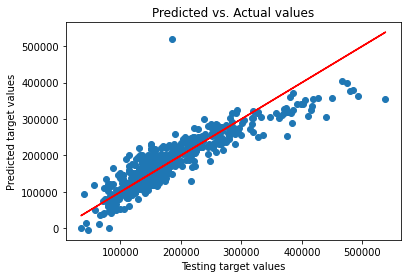

In [172]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.plot(y_test, y_test, color='red')
ax.set_xlabel('Testing target values')
ax.set_ylabel('Predicted target values')
ax.set_title('Predicted vs. Actual values');

## 6. Make predictions

In [173]:
from collections import OrderedDict

In [174]:
new_data = OrderedDict([ 
    ('feature08', 8),
    ('feature07', 1000),
    ('feature01', 1),
    ('feature02', 400),
    ('feature04', 900)]
)

new_data = pd.Series(new_data).values.reshape(1,-1) 

linear_regression_model.predict(new_data)

C:\Users\jessi\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([187732.61723963])

Model predicts target value is 187732